In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)
# mouse_df.head()
# clinical_trial_df.head()

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_df, mouse_df, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
placeholder = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()


# Convert to DataFrame
dataframe = pd.DataFrame(placeholder).reset_index()

#Preview DataFrame
dataframe



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_grouped = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error_grouped).reset_index()

# Preview DataFrame
standard_error_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drugtable = pd.pivot_table(combined_data,index=['Timepoint'],values=['Tumor Volume (mm3)'],columns=['Drug'])
# reset the index
drugtable.columns = drugtable.columns.droplevel(0)
drugtable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


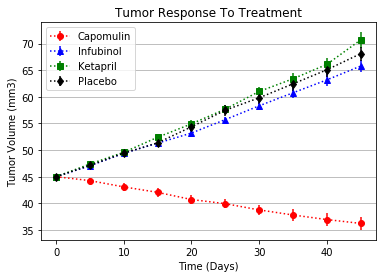

In [110]:
# Plot
fig, ax = plt.subplots()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response To Treatment")

drugs =  ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
marker = ["o", "^", "s", "d"]
color = ["red", "blue", "green", "black"]
stderr_x_axis = [row for row in drugtable.index]

stdErrPivot = standard_error_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

i = 0

for drug in drugs:
    y_axis = drugtable[drug]
    ax.errorbar(stderr_x_axis, y_axis, stdErrPivot[drug], linestyle=":", fmt=marker[i], color=color[i], label=drug)
    i = i+1
plt.legend()
ax.yaxis.grid()
plt.savefig("../Images/TumorResponse.png")

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsitegrouped = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
metsite_df = pd.DataFrame(metsitegrouped)

# Preview DataFrame
metsite_df






Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [73]:
stderrgrouped = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
stderrgrouped_df = pd.DataFrame(stderrgrouped).reset_index()
stderrgrouped_df



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [94]:
# Minor Data Munging to Re-Format the Data Frames
drugtable2 = pd.pivot_table(combined_data,index=['Timepoint'],values=['Metastatic Sites'],columns=['Drug'])
# reset the index
drugtable2.columns = drugtable2.columns.droplevel(0)
drugtable2


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


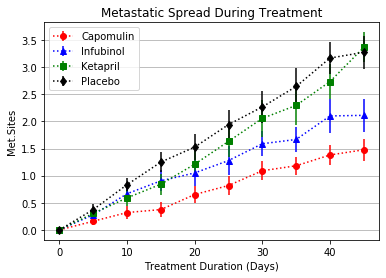

In [98]:
# Plot
fig, ax = plt.subplots()
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met.Sites")
ax.set_title("Metastatic Spread During Treatment")

drugs =  ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
marker = ["o", "^", "s", "d"]
color = ["red", "blue", "green", "black"]
x_axis = [row for row in drugtable2.index]

stdErrPvt = stderrgrouped_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

i = 0

for drug in drugs:
    y_axis = drugtable2[drug]
    ax.errorbar(x_axis, y_axis, stdErrPvt[drug], linestyle=":", fmt=marker[i], color=color[i], label=drug)
    i = i+1
    
plt.legend()
ax.yaxis.grid()
plt.savefig("../Images/MetastaticSpread.png")

In [102]:
mousecountgrouped = combined_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mousecount_df = pd.DataFrame(mousecountgrouped).reset_index()

# Preview DataFrame
mousecount_df

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [105]:
# Minor Data Munging to Re-Format the Data Frames
mousetable = pd.pivot_table(mousecount_df,index=['Timepoint'],values=['Mouse ID'],columns=['Drug'])
# reset the index
mousetable.columns = mousetable.columns.droplevel(0)
mousetable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


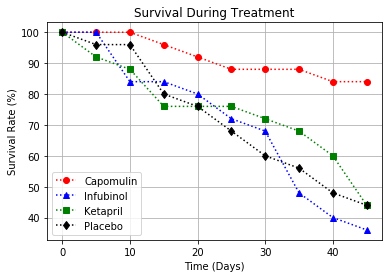

In [120]:
Drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
marker = ["o", "^", "s", "d"]
color = ["red", "blue", "green", "black"]

x_axis = [row for row in mousetable.index]

fig, ax = plt.subplots()

i = 0

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
             
for drug in drugs:
    ax.plot(stderr_x_axis, (100 * mousetable[drug])/mousetable[drug][0], marker=marker[i], linestyle=":", label=drug, color=color[i])
    i = i+1
    
plt.legend()
plt.grid()

plt.savefig("../Images/SurvivalRates.png")